## ToDo List

* get our workspace ready, importing libraries

* getting images and their labels
*	create pathnames for each image    
*	one hot encoding style boolean array for each image's breed name  
* create val set, as a test set is available on Kaggle 

* turning data into tensors
  * `tf.image.decode_jpeg()` and create a function to do this for all the other images 
  * convert 0-255 to 0-1
  * return in original size (in our case it is 224, 224)
* create batches, by default of size 32 (because gpu has limited amount of memory)
  * we need to convert `X` and `y` (not in case of test data) into batches

---

Building a model

* we will first build the model only on 1000 images
* parameters required - input shape, output shape, model url (How to select model for neural network training) - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
* fitting the data into the model
* we will use sequential api `tf.keras.sequential()`, then compile and then build
* return the model
* model.summary()

--- 

creating call backs 
* tensorboard callbacks
  * load extension
  * create logs for tracking the progress of the model for future reference, add time and validation/train
* early stopping callbacks

---

Training the model with paritial datasets
* fitting the model with - train data, **validation data** , callbacks and other parameters like epochs, validation_freq 

---
after building the model, let's see this later
* check the tensorboard
* make prediction on validation dataset, but before that, we need to unbatchify that data (Can we make prediction in form of batches)

---
---

Training the model with full datasets






## Setting up the env and mounting the libraries

In [3]:
# getting the libraries ready
import tensorflow as tf
import tensorflow_hub as hub

#check if gpu is available, if not go to runtime and select "change runtime type"
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
# mount the drive as we will need storage 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive

/content/drive


In [6]:
pwd

'/content/drive'

In [7]:
# the file has already been zipped 
# unzipping the file and getting the data ready
# !unzip "/content/drive/My Drive/Dog Breed Kaggle/dog-breed-identification.zip" -d "/content/drive/My Drive/Dog Breed Kaggle/Dog Breed Practice"


In [8]:
import numpy as np
import pandas as pd

In [9]:
train_labels = pd.read_csv("/content/drive/MyDrive/Dog Breed Kaggle/Dog Breed Practice/labels.csv")
train_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


## Preparing the training dataset

### Converting label in desired format

In [10]:
unique_breeds = np.unique(train_labels["breed"])
len(unique_breeds), unique_breeds

(120,
 array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter'

In [11]:
sample_array = unique_breeds == train_labels["breed"][1]
sample_array

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [12]:
sample_array.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
# creating int type boolean array for each training example
boolean_label = [(label == unique_breeds).astype(int) for label in train_labels["breed"]]
boolean_label[:2]

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

In [14]:
len(boolean_label), boolean_label[1].shape

(10222, (120,))

### Creating filepath of train data
Instead of storing the actual file, we will create a list of path of all the images


In [15]:
import os
train_folder_dir = "/content/drive/MyDrive/Dog Breed Kaggle/Dog Breed Practice/train/"
train_filepaths = [train_folder_dir + files + ".jpg" for files in train_labels["id"]]

In [16]:
len(train_filepaths)

10222

In [17]:
train_filepaths[:10]

['/content/drive/MyDrive/Dog Breed Kaggle/Dog Breed Practice/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Breed Kaggle/Dog Breed Practice/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Breed Kaggle/Dog Breed Practice/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Breed Kaggle/Dog Breed Practice/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Breed Kaggle/Dog Breed Practice/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Breed Kaggle/Dog Breed Practice/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Breed Kaggle/Dog Breed Practice/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Breed Kaggle/Dog Breed Practice/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Breed Kaggle/Dog Breed Practice/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Breed Kaggle/Dog 

## Understand our data

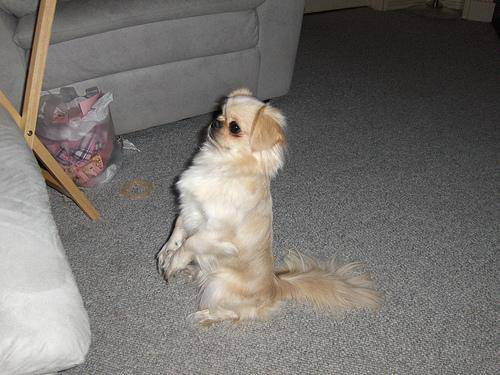

In [18]:
# display the image, from the image path
from IPython.display import Image, display
Image(train_filepaths[2])

In [19]:
# the default size is byte
for x in train_filepaths[:10]:
  print(os.path.getsize(x))

54775
49514
33339
40134
26442
48129
31936
15031
83174
32188


In [20]:
# convert image into numpy array
from matplotlib.pyplot import imread

for x in train_filepaths[:10]:
  print(imread(x).shape)

(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(344, 400, 3)
(500, 500, 3)
(375, 500, 3)
(470, 500, 3)
(227, 231, 3)
(500, 474, 3)
(332, 500, 3)


We can see that the size of all the images are different, we will convert these images into tensors and then resize all the images into same size

## Create a val dataset

In [21]:
X = train_filepaths
y = boolean_label

In [22]:
# consider only 1000 example as of now
NUM_IMAGES = 1000 #@param {type: "slider", min: 100, max: 1000, step : 100}


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES], 
                                                  test_size = 0.2,
                                                  random_state = 42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

## Turning data into tensors
We need to convert our images into tensors as results are alredy in numerical format

Let's create a function to create data into tensors, as it can be used to convert future test values as well
this function will
* read an image from the path
* convert into a tensor 
* resize to Fixed size
* rescale form 0-255 to 0-1 
* return

In [24]:
sample = tf.io.read_file(train_filepaths[1])
sample = tf.image.decode_jpeg(sample, channels = 3)
sample = tf.image.convert_image_dtype(sample, tf.float32)
sample = tf.image.resize(sample, size = [224, 224])
sample

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.22176053, 0.1532646 , 0.12077089],
        [0.24290617, 0.17007563, 0.12532842],
        [0.25025794, 0.16272292, 0.10750583],
        ...,
        [0.4866906 , 0.31810698, 0.18481737],
        [0.46775866, 0.32910115, 0.20204483],
        [0.36027768, 0.2283099 , 0.11981372]],

       [[0.22331059, 0.14479166, 0.10454448],
        [0.20956516, 0.13433544, 0.08120592],
        [0.20576334, 0.11818807, 0.06297097],
        ...,
        [0.34747207, 0.21052358, 0.10098223],
        [0.25428382, 0.14531395, 0.05989731],
        [0.22268865, 0.11715643, 0.03506609]],

       [[0.21673436, 0.12777252, 0.0741048 ],
        [0.20701681, 0.11805496, 0.05878148],
        [0.22288738, 0.12433178, 0.0666433 ],
        ...,
        [0.19956292, 0.10319562, 0.05528758],
        [0.24323113, 0.17113218, 0.12510629],
        [0.17322923, 0.11525137, 0.08183777]],

       ...,

       [[0.71888185, 0.40606675, 0.10109472],
        [0.72

In [25]:
def process_image_into_tensors(image_path, *label): # can we fix the length of labels
  """
  Takes an image file path and turns the image into a Tensor.
  Label is not present in test data
  """

  # read an image file and store in a variable
  image = tf.io.read_file(image_path)

  # turn jpg into numerical tensor with RBG
  image = tf.image.decode_jpeg(image, channels = 3)

  # Convert the colour channel values 0-255 to 0-1, to make the computation more efficient
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize to (244, 244)
  image = tf.image.resize(image, size = [224, 224])

  return image, label[0]

## Create Batches

In [26]:
#usually the batch size is 32 only

BATCH_SIZE = 32

def create_data_batches(X, y = None, batch_size = BATCH_SIZE, 
                        valid_data = False, test_data = False):
  """
  Test data will not have any y(image label)
  Shuffles the data if it is training data
  """

  if test_data :
    print("Creating test data into batches..")
    data = tf.data.Dataset.from_tensor_slices((X)) #NOTE - Using X instead of tf.constant(X)
    # data = data.map(process_image_into_tensors).batch(BATCH_SIZE)
    
  else:
    data = tf.data.Dataset.from_tensor_slices((X, y))  
    if valid_data:
      print("Creating validation data batches..")
      # data = data.map(lambda X, y : # taking 2 elements and applying 
      #                 (process_image_into_tensors(X), y)).batch(BATCH_SIZE)
    
    
    else :
      print("Creating training data batches..")
      #now we will shuffle the data
      data = data.shuffle(buffer_size = len(X))
      # data = data.map(lambda X, y :
      #                 (process_image_into_tensors(X), y)).batch(BATCH_SIZE)
      
  data = data.map(process_image_into_tensors).batch(BATCH_SIZE)
  return data

In [27]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating validation data batches..
Creating validation data batches..
